In [1]:
!pip install pyautogui tk webdriver-manager selenium pandas seaborn urllib3 chardet selenium-stealth alive_progress pyarrow fastparquet

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Using legacy 'setup.py install' for pyautogui, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pygetwindow, since package 'wheel' is not installed.
Using legacy 'setup.py install' for PyTweening, since package 'wheel' is not install

You should consider upgrading via the 'c:\users\lily\projects\dsc180-project-1\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


You should consider upgrading via the 'c:\users\lily\projects\dsc180-project-1\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.action_chains import ActionChains

from selenium.webdriver.chrome.options import Options

from selenium_stealth import stealth

import time
import datetime
import random
import re
import glob
from alive_progress import alive_bar

import pandas as pd
import numpy as np
import requests
import socket
import platform

from bs4 import BeautifulSoup
#cdm = ChromeDriverManager().install()
#cdm = ChromeDriverManager(path="C:\Program Files\Google\Chrome\Application\chrome.exe")
#cdm = ChromeDriverManager(path="/usr/bin/google-chrome")



In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--disable-notifications")
#options.add_argument("--homepage https://google.com")

options.add_argument("--incognito")
options.add_experimental_option("prefs", {"plugins.plugins_list": [{"enabled": False, "name": "Chrome PDF Viewer"}]})
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
#options.add_experimental_option("debuggerAddress", "127.0.0.1:9222");
options.add_argument("--start-maximized");
options.add_argument("--disable-blink-features")
#options.add_argument("--user-data-dir=C:\\Users\\Stu\\AppData\\Local\\Google\\Chrome\\User Data\\Profile 1")
options.add_argument('--disable-extensions')

options.add_argument("--no-sandbox")
#options.add_argument("--headless")

In [6]:
import pyautogui

### Metadata about when & where this was run

In [7]:
run_dt = datetime.datetime.now()
run_location = "ucsd"
run_platform = platform.platform()
run_browser = "chrome"
run_ip = requests.get('https://ipinfo.io/ip').content.decode('utf8')
print(run_dt,run_location,run_platform,run_browser,run_ip)

2022-10-26 15:17:24.811317 ucsd Windows-10-10.0.17763-SP0 chrome 76.80.186.10


In [8]:
def simulate_typing(text,element,delay=.1,driver=None):
    element.send_keys(" ") # not sure why first character doesn't get sent
    count=0
    for letter in text:
        element.send_keys(letter)
        time.sleep(delay*random.uniform(.75, 1.25))
        if driver:
            driver.save_screenshot('screenshot-temp/suggestion-' + str(count).zfill(2) + '.png')
        count += 1
    
    if driver:
        frames = []
        imgs = glob.glob("screenshot-temp/*.png")
        imgs.sort()
        for i in imgs:
            new_frame = Image.open(i)
            frames.append(new_frame)

        # Save into a GIF file that loops forever
        frames[0].save('typing.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [9]:
def send_search(driver,query,delay=.1):
    driver.get('https://www.google.com')
    time.sleep(5*random.uniform(.75, 1.25))    

    search_bar = driver.find_element(By.NAME, 'q')
    simulate_typing(query,search_bar,delay)
    search_bar.send_keys(Keys.ENTER)
    
    time.sleep(1)
    
    return [m.start() for m in re.finditer('<span class=\".{5,20}\">Ad.{0,1}<span', driver.page_source)]

In [10]:
def direct_search(driver,query,delay=.1):
    pyautogui.moveTo(pyautogui.size().width/2, 90, duration =1)
    pyautogui.click(pyautogui.size().width/2, 90)
    pyautogui.write(query, interval=.15)
    pyautogui.press('enter')
    
    #query = query.replace(" ","+")
    #driver.get("https://www.google.com/search?q=" + query + "&oq=" + query + "&sourceid=chrome&ie=UTF-8")
    #time.sleep(1*random.uniform(.75, 1.25))    

    return [m.start() for m in re.finditer('<span class=\".{5,20}\">Ad.{0,1}<span', driver.page_source)]

In [11]:
def scroll(driver, delay=.1):
    body = driver.find_element_by_tag_name("body")
    for x in range(0,random.randrange(3,6)):
        for y in range(0,random.randrange(5,10)):
            body.send_keys(Keys.DOWN)
            time.sleep(.1*random.uniform(.75,1.25))
        time.sleep(1*random.uniform(.75,1.25))

In [12]:
def save_screenshot(driver: webdriver.Chrome, path: str = '/tmp/screenshot.png') -> None:
    # Ref: https://stackoverflow.com/a/52572919/
    original_size = driver.get_window_size()
    required_width = driver.execute_script('return document.body.parentNode.scrollWidth')
    required_height = driver.execute_script('return document.body.parentNode.scrollHeight')
    driver.set_window_size(required_width, required_height)
    driver.save_screenshot(path)  # has scrollbar
    #driver.find_element_by_tag_name('body').screenshot(path)  # avoids scrollbar
    driver.set_window_size(original_size['width'], original_size['height'])

In [13]:
def get_ad_text(html):
    soup = BeautifulSoup(html, "html.parser")
    ad_text = ""
    for x in soup.find_all(name="div"):
        if 'data-text-ad' in x.attrs.keys():
            ad_text += x.text
    
    return ad_text

In [14]:
def internet(host="8.8.8.8", port=53, timeout=3):
    """
    Host: 8.8.8.8 (google-public-dns-a.google.com)
    OpenPort: 53/tcp
    Service: domain (DNS/TCP)
    """
    try:
        socket.setdefaulttimeout(timeout)
        socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect((host, port))
        return True
    except socket.error as ex:
        print(ex)
        return False


In [15]:
internet()

True

In [16]:
driver = webdriver.Chrome(chrome_options=options)

C:\Users\Lily\AppData\Local\Temp\ipykernel_2920\2553989415.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


In [17]:
class CAPTCHAException(Exception):
    pass

def google_search(query, driver):
    if internet():
        try:
            driver.get("https://www.google.com/search?q=" + query + "&rlz=1C1GCEA_enUS980US980&oq=" + query + "&aqs=chrome..69i57.3568j0j9&sourceid=chrome&ie=UTF-8")
            if len(driver.page_source) < 100000:
                raise CAPTCHAException
            else:
                return driver.page_source
        except CAPTCHAException:
            print("CAPTCHA detected!")
            return driver.page_source
    else:
        print("No internet")
        return None

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>hii - Google Search</title><script nonce="">(function(){\nvar b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'C7JZY9zjJ86IkPIPloKD0A8\',kEXPI:\'31\',kBL:\'TFBo\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&cshid="+f._cshid);c=c||"/"+(g|
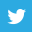
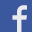
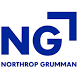
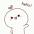
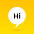
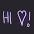
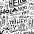
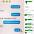
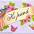
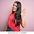
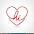
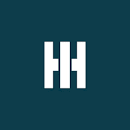
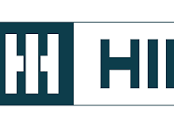
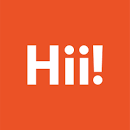
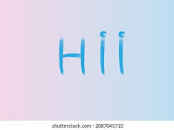
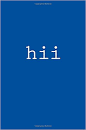
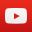
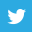
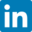
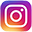
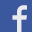
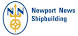
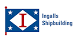
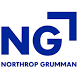
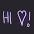
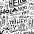
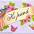
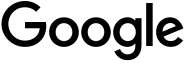
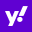
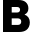
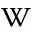

In [18]:
google_search("hii", driver)

In [ ]:
pyautogui.position()

In [ ]:
def run_query_autogui(query,driver):
    pyautogui.FAILSAFE = False
    try:
        print("Query: ", query)
        #driver = webdriver.Chrome(executable_path="C:\Program Files\Google\Chrome\Application\chrome.exe",chrome_options=options)
        #ads_result = direct_search(driver,query)
        #ss_filename = "screenshots/" + row['group'] + '/' + query + ".png"

        #save_screenshot(driver,ss_filename)
        
        
        #query_url = query.replace(" ","+")
        driver.get("https://google.com")
        
        #pyautogui.moveTo(pyautogui.size().width/2, 90, duration =1)
        #pyautogui.click(pyautogui.size().width/2, 90)
        pyautogui.moveTo(4290,575, duration=1)
        pyautogui.click(4290,575)
        pyautogui.write(query, interval=.15)
        pyautogui.press('enter')
        pyautogui.moveTo(random.randint(0,pyautogui.size().width),random.randint(0,pyautogui.size().height),duration=1)
        


        ads_result = [m.start() for m in re.finditer('<span class=\".{5,20}\">Ad.{0,1}<span', driver.page_source)]
        
        
        #body = driver.find_element_by_tag_name("body")
        for x in range(0,random.randrange(3,6)):
            for y in range(0,random.randrange(5,10)):
                pyautogui.press('down')
                time.sleep(.1*random.uniform(.75,1.25))
            time.sleep(1*random.uniform(.75,1.25))
            
        html_len = len(driver.page_source)
            
        result = {  'query':query,
                    'query_datetime':datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'html':driver.page_source,
                    'html_len':html_len}            
            
        if html_len < 100000:
            result['captcha'] = True
            #results.append(result)
            print(query, "CAPTCHA DETECTED!!!!!")
            time.sleep(60)
        else:
            result['captcha'] = False
            
    except Exception as e:
        print(query,e)
        if "ERR_INTERNET" or "DISCONNECTED" in str(e):
            return (False, "networkfail")
        else:
            return (False, str(e))

        pass

In [ ]:
run_query_autogui("hiiii", driver)

In [ ]:
driver = webdriver.Chrome(chrome_options=options,executable_path="C:\\Users\\S\\Documents\\selenium_180a\\chromedriver.exe")

In [ ]:
run_query_autogui(index,row,driver)